In [1]:
%matplotlib inline
import numpy as np 

from astropy.table import Table 

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'stixgeneral'

All available dwarf galaxy CGM data points (literature + new obs + archive)

In [2]:
# all dwarf-qso pairs from the literature + new obs & archival 
gal_qso_all = Table.read('data/zheng_dwarfcgm-survey_nocut-in-mstar-snr-b.csv', format='ascii')

# in NewObs/Archived sample, not include those >R200m 
ind_aa = gal_qso_all['References'] == 'NewObs/Archived'
ind_bb = gal_qso_all['impact_para_kpc'] > gal_qso_all['R200m_kpc']
ind_cc = ind_aa & ind_bb
gal_qso_all = gal_qso_all[np.logical_not(ind_cc)]

tb = gal_qso_all.copy()
logMstar_all = tb['logM*']
logMstar_all_err = tb['logM*_err']

ref_all = tb['References']
snr_all = tb['qso_hsla_snr']

rho_all = tb['impact_para_kpc']
rho_all_err = tb['impact_para_err']

r200m_all = tb['R200m_kpc']
r200m_all_err = tb['R200m_err']

rho_norm_all = np.around(rho_all/r200m_all, decimals=3)
rho_norm_all_err = np.around(rho_norm_all*np.sqrt((rho_all_err/rho_all)**2 + (r200m_all_err/r200m_all)**2), 
                             decimals=3)

Final data set that used in the paper (Full Sample)

In [4]:
##### 
# Full Sample: dwarf qso pairs that we use in the paper
gal_qso_final = Table.read('data/zheng_dwarfcgm-survey_cut-mstar9.5-snr8-br200m.csv', format='ascii')
tb = gal_qso_final.copy()
logMstar_sub = tb['logM*']
logMstar_sub_err = tb['logM*_err']

ref_sub = tb['References']
snr_sub = tb['qso_hsla_snr']

rho_sub = tb['impact_para_kpc']
rho_sub_err = tb['impact_para_err']

r200m_sub = tb['R200m_kpc']
r200m_sub_err = tb['R200m_err']

rho_norm_sub = np.around(rho_sub/r200m_sub, decimals=3)
rho_norm_sub_err = np.around(rho_norm_sub*np.sqrt((rho_sub_err/rho_sub)**2 + (r200m_sub_err/r200m_sub)**2), 
                             decimals=3)

Some set up for plots 

In [5]:
refs = ['Bordoloi+2014', 'Johnson+2017', 
         'Liang&Chen2014', 'Qu&Bregman2022', 'Zheng+2019b', 
          'Zheng+2020b', 'NewObs/Archived']
symbols = ['s', 'D', 'p', 'X', '*', '<', 'o'] # same for all figures 
ss =      [40,   30,  50,  60, 100,  60,  60]
#ss_err = [6, 6, 6, 6, 10, 6, 6]
ss_err = [9, 9, 9, 9, 9, 9, 9]

impact_label = r'Impact Parameter b (kpc)/ R$_{\rm 200m}$'
mstar_label = r'log$_{10}$(M$_*$/M$_\odot$)'

colors = ['steelblue', 'g', plt.cm.Greys(0.6), 
          plt.cm.Greys(0.7), plt.cm.Greys(0.7), 
          plt.cm.Greys(0.7), 'r']

ymin, ymax = 6.3, 11.3
xmin, xmax = 0.04, 7

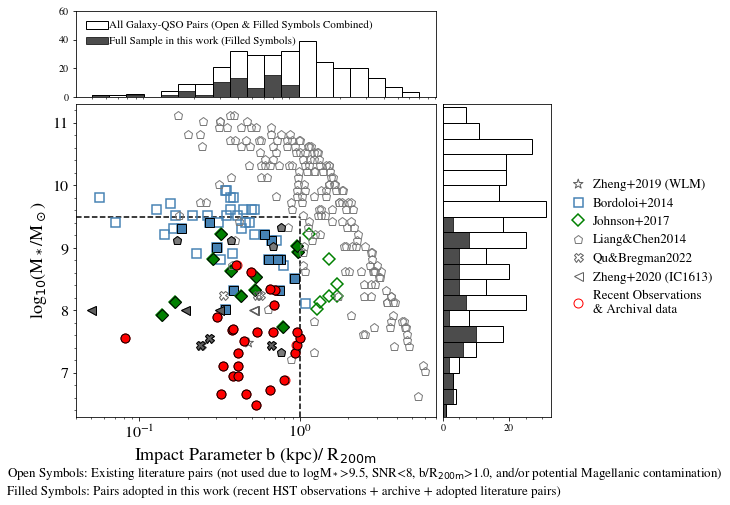

In [6]:
#fig = plt.figure(figsize=(7, 7.6))
fig = plt.figure(figsize=(10, 7))
fs = 14

ax = fig.add_axes([0.1, 0.175, 0.5, 0.62])
ax_up = fig.add_axes([0.1, 0.81, 0.5, 0.17])
ax_rt = fig.add_axes([0.61, 0.175, 0.15, 0.62])

### top historgram
ax_up.hist(rho_norm_all, bins=np.logspace(np.log10(xmin), np.log10(xmax), 20), 
           edgecolor='k', facecolor='none', label='All Galaxy-QSO Pairs (Open & Filled Symbols Combined)')
ax_up.hist(rho_norm_sub, bins=np.logspace(np.log10(xmin), np.log10(xmax), 20), 
           edgecolor='k', facecolor='k', alpha=0.7, label='Full Sample in this work (Filled Symbols)')
ax_up.set_xscale('log')
ax_up.set_xticks([])
ax_up.legend(fontsize=fs-3, frameon=False, loc='upper left', handletextpad=0.15)
ax_up.set_ylim(0, 60)

# right histogram
ax_rt.hist(logMstar_all, bins=np.mgrid[6:12.1:0.25], 
           orientation='horizontal', edgecolor='k', facecolor='none')
ax_rt.hist(logMstar_sub, bins=np.mgrid[6:12.1:0.25], 
           orientation='horizontal', edgecolor='k', facecolor='k', alpha=0.7)
ax_rt.set_ylim(ymin, ymax)
ax_rt.set_yticks([])
ax_rt.minorticks_on()

## Central main figure 
for i, iref in enumerate(refs): 
    ind_ref = ref_all == iref
    if iref in ['Bordoloi+2014', 'Johnson+2017']: 
        lw = 1.5
    else: 
        lw=1
        
    iref_label = iref
    if iref == 'NewObs/Archived': 
        iref_label = 'Recent Observations\n& Archival data'
    if iref == 'Zheng+2019b': 
        iref_label = 'Zheng+2019 (WLM)'
    if iref == 'Zheng+2020b':
        iref_label = 'Zheng+2020 (IC1613)'
        
    if 'Zheng+2019' in iref:
        ax.scatter(rho_norm_all[ind_ref], logMstar_all[ind_ref],  
                s=ss[i], facecolor='none', lw=lw,
                marker=symbols[i], edgecolor=colors[i], label=iref_label)
    else: 
        ax.errorbar(rho_norm_all[ind_ref], logMstar_all[ind_ref], 
                    #xerr=rho_norm_all_err[ind_ref], 
                    #yerr=logMstar_all_err[ind_ref], 
                    fmt=symbols[i], markerfacecolor='none', 
                    markeredgecolor=colors[i], ecolor=colors[i], 
                    markeredgewidth=lw, markersize=ss_err[i], label=iref_label)

    ind_ref = ref_sub == iref
    if len(rho_norm_sub[ind_ref]) >0:
        ax.errorbar(rho_norm_sub[ind_ref], logMstar_sub[ind_ref], 
                #xerr=rho_norm_sub_err[ind_ref], 
                #yerr=logMstar_sub_err[ind_ref], 
                fmt=symbols[i], markeredgecolor='k', 
                color=colors[i], ecolor=colors[i], 
                lw=0.5, label=None, markersize=ss_err[i])

ax.vlines(1., ymin, 9.5, linestyle='--', color='k')
ax.hlines(9.5, xmin, 1, linestyle='--', color='k')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.tick_params(labelsize=fs+2)
ax.minorticks_on()
ax.set_xlabel(impact_label, fontsize=fs+4)
ax.set_xscale('log')
ax.set_ylabel(mstar_label, fontsize=fs+4)
ax.legend(bbox_to_anchor=(1.8, 0.8), frameon=False, fontsize=fs-1, handletextpad=0.1)

######## Add legend at the bottom 
t1a = r'Open Symbols: Existing literature pairs (not used due to logM$_*$>9.5, SNR<8, b/R$_{\rm 200m}$>1.0, and/or potential Magellanic contamination)'
#t1b = r'and/or potential Magellanic contamination)'
fig.text(0.005, 0.055, t1a, transform=fig.transFigure, fontsize=fs-1)
#fig.text(0.437, 0.045, t1b, transform=fig.transFigure, fontsize=fs-2)

t2 = r'Filled Symbols: Pairs adopted in this work (recent HST observations + archive + adopted literature pairs)'
fig.text(0.005, 0.02, t2, transform=fig.transFigure, fontsize=fs-1)


fig.savefig('figs/fig1_logMstar_rho_alldwarfs_refined.pdf')
#fig.savefig('/Users/Yong/Desktop/test.pdf')